In [24]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

In [25]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [27]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
            "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [28]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

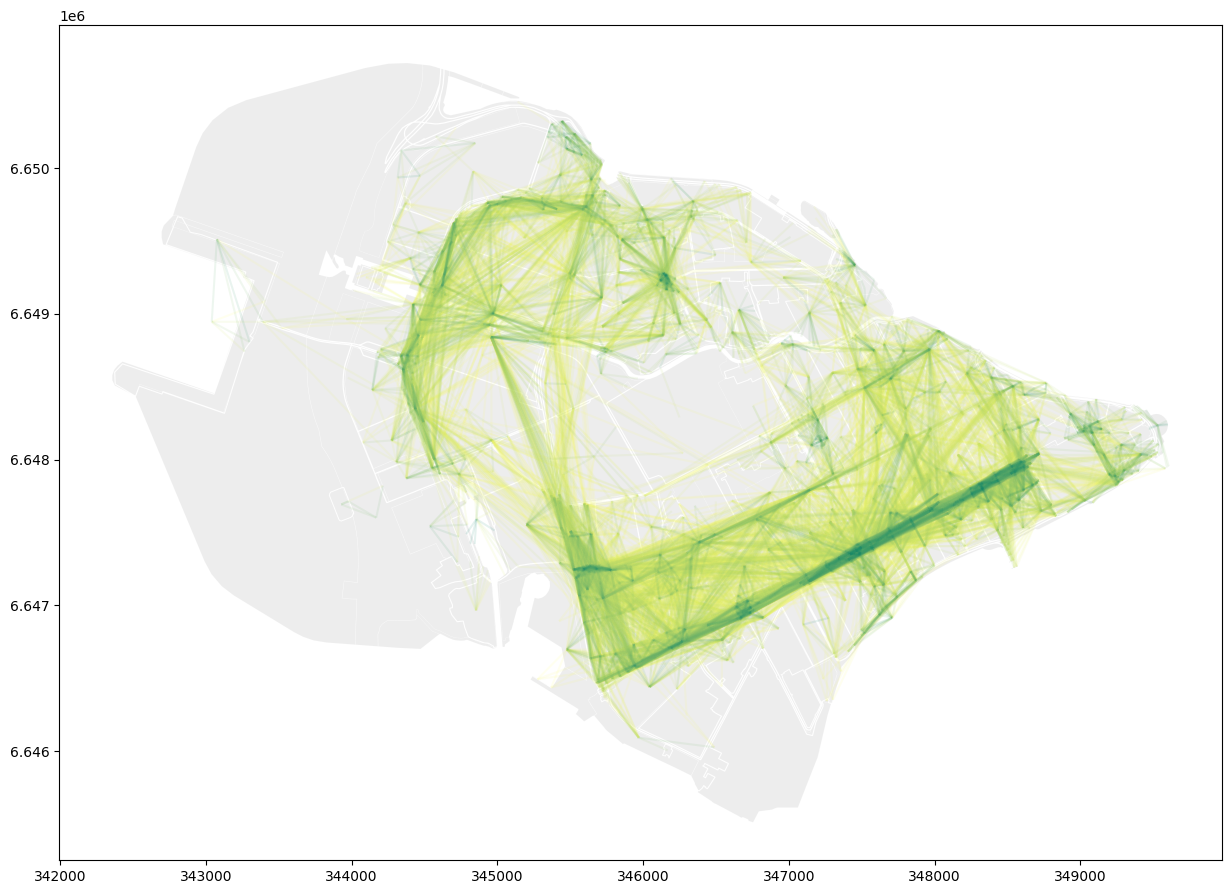

In [29]:
city_model.visualize()

In [30]:
from masterplan_tools import ProvisionModel

services_prov = {}

for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

total load = 24945
total capacity = 31356
fin
 load = 0
 cap = 6411
schools
total load = 12650
total capacity = 10459
fin
 load = 2191
 cap = 0
kindergartens
total load = 12443
total capacity = 13056
fin
 load = 0
 cap = 613
recreational_areas
total load = 1813
total capacity = 15789
fin
 load = 0
 cap = 13976
hospitals
total load = 10357
total capacity = 12942
fin
 load = 0
 cap = 2585
pharmacies
total load = 5565
total capacity = 24665
fin
 load = 0
 cap = 19100
policlinics


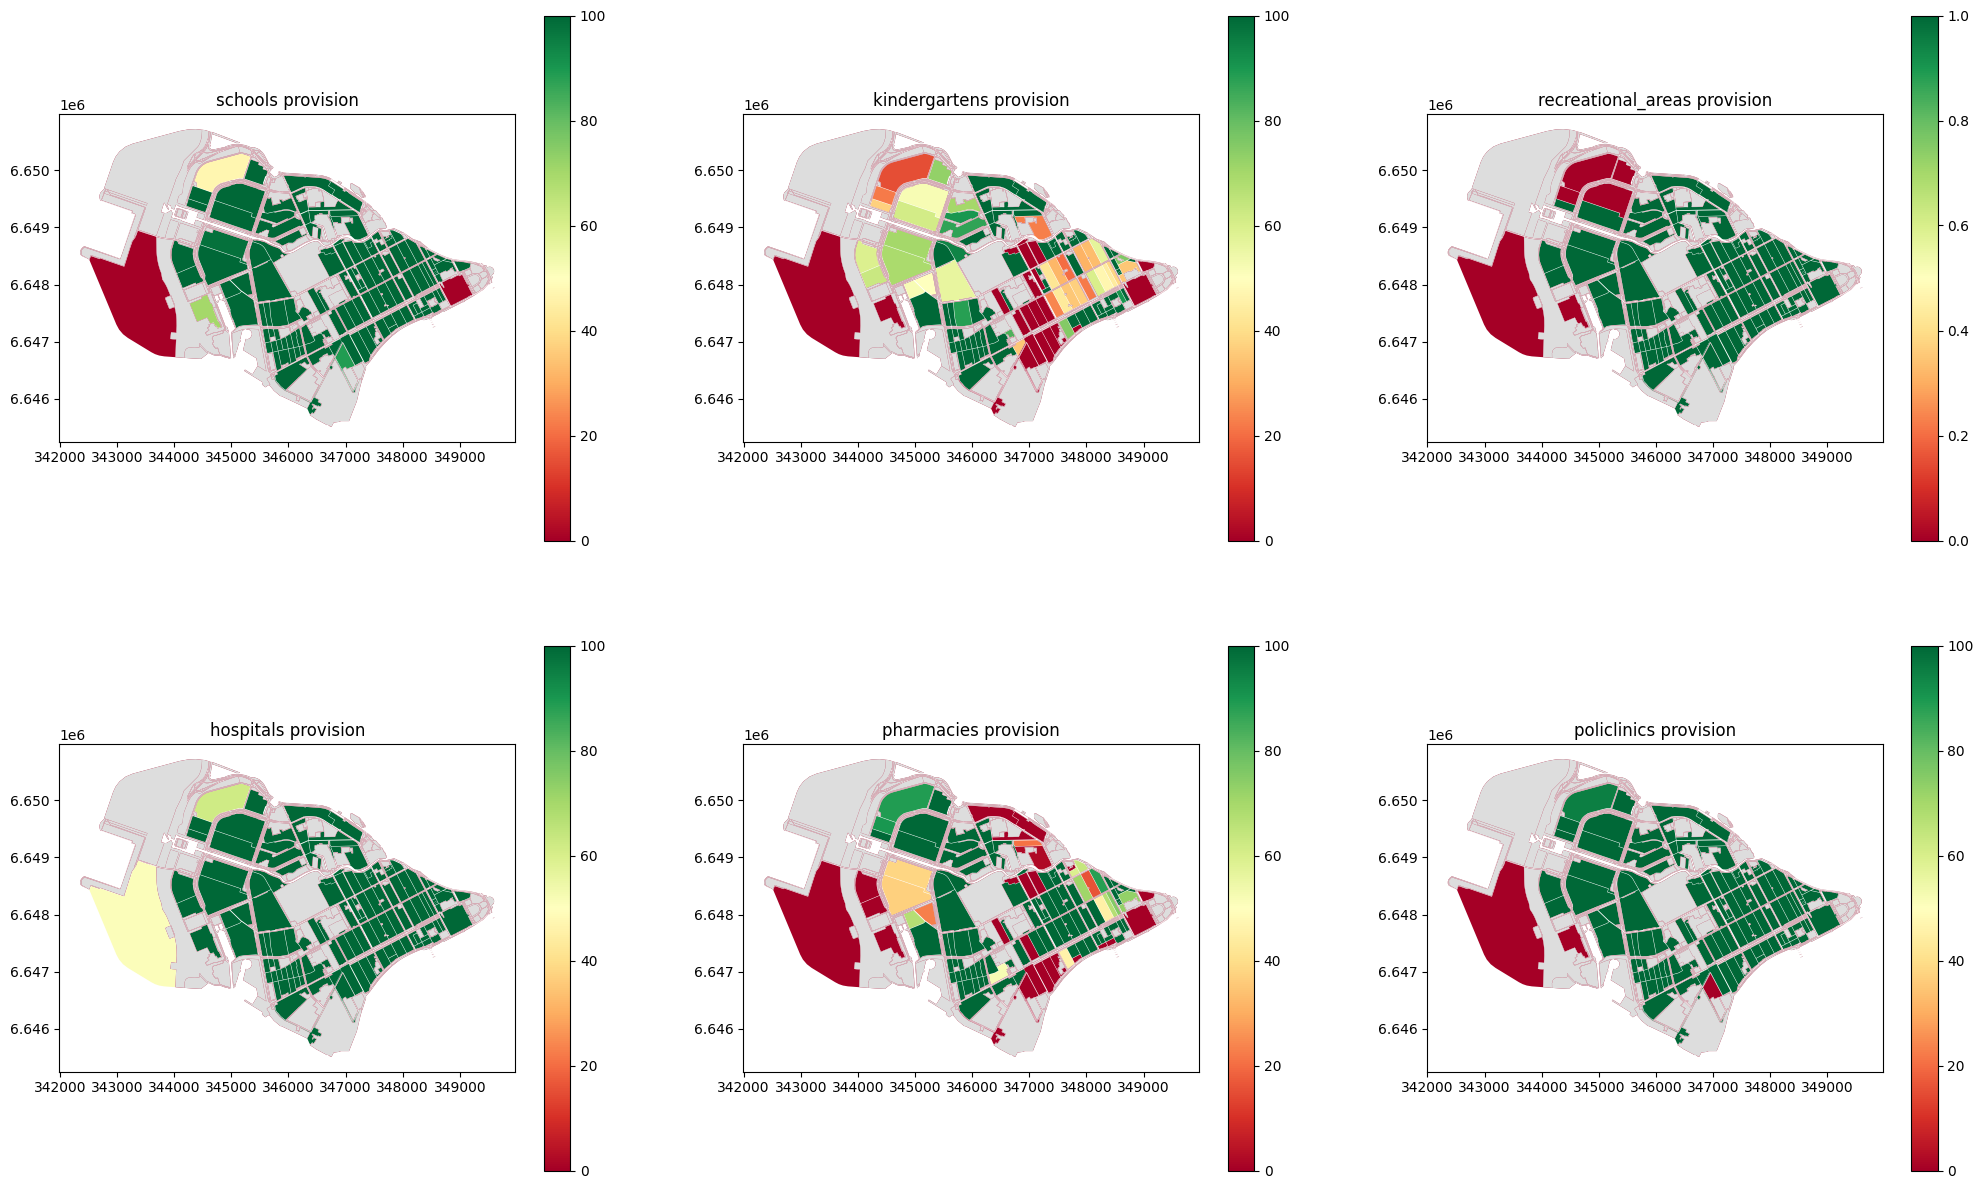

In [31]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def show_me_chart(fig, gs, prov, name, i):
  ax = fig.add_subplot(gs[i//3, i%3])
  prov.plot(column="provision_"+name, legend=True, ax=ax, cmap='RdYlGn')
  ax.set_title(name +" provision")
  prov[prov["population"] == 0].plot(ax=ax, color="#ddd", alpha=1)


kindergartens_prov = services_prov["kindergartens"]
schools_prov = services_prov["schools"]
recreational_areas_prov = services_prov["recreational_areas"]
hospitals_prov = services_prov["hospitals"]
pharmacies_prov = services_prov["pharmacies"]
policlinics_prov = services_prov["policlinics"]

fig = plt.figure(figsize=(25, 15))
gs = GridSpec(2, 3, figure=fig)

i = 0
for service_type in services_prov:
  show_me_chart(fig, gs, services_prov[service_type], service_type, i)
  i = i+1

plt.show()